We would like to test whether the whole weight of the snail is on average different between male and female snails.

In [1]:
#Setup dataframe and visualizations
import math
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
sns.set()

#suppress warnings
import warnings
warnings.filterwarnings('ignore')

url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/abalone_csv.csv"
df = pd.read_csv(url)
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
df_m = df.iloc[(df["Sex"] == 'M').values][['Whole_weight']]
df_f = df.iloc[(df["Sex"] == 'F').values][['Whole_weight']]
#Initial examination of the data indicates that there is a third type of sex, I that will be unobserved.
df_m.info()
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1528 entries, 0 to 4176
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Whole_weight  1528 non-null   float64
dtypes: float64(1)
memory usage: 23.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 2 to 4175
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Whole_weight  1307 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB


Does this data meet the assumptions to answer such a question statistically?

Yes. The data does meet the assumptions to answer a question statistically. 

Visually, the distribution does appear to be within the normal ranges for kurtosis and skewness. According to the description, the data falls within the acceptable range. 


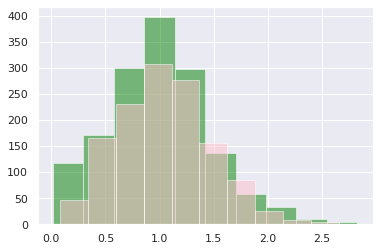

In [15]:
plt.hist(df_m['Whole_weight'], alpha = .5, color='green')
plt.hist(df_f['Whole_weight'], alpha = .5, color='pink')
plt.show()

In [6]:
#Description of the two distributions
print(stats.describe(df_m['Whole_weight']))
print(stats.describe(df_f['Whole_weight']))

DescribeResult(nobs=1528, minmax=(0.0155, 2.8255), mean=0.9914594240837696, variance=0.22144682906633475, skewness=0.40560877693983, kurtosis=0.3522080855157492)
DescribeResult(nobs=1307, minmax=(0.08, 2.657), mean=1.0465321346595258, variance=0.18517212913502626, skewness=0.36807506367868875, kurtosis=0.059025885863292604)


What are the formal hypotheses?

On average we expect that the male population of the abalone snail weighs significantly more when compared to the female population. 

In [13]:
#scipy t-test value will test our hypthosis against the two variables.
stats.ttest_ind(df_m['Whole_weight'], df_f['Whole_weight'])

Ttest_indResult(statistic=-3.230536346547456, pvalue=0.0012497207919589404)

Conduct the hypothesis test. What is the p-value? What can you say given the p-value and significance level?

The p-value is at 0.1%. We can say that there is a 0.1% chance that observing a difference as large as what is observed even if the two population means are identical (the null hypothesis is true). 

The initial conducted on a visual cue of the graph was incorrect. The appropriate behavior is to observe the mean, or average weights of these animals. Upon that observation, we find that females are on average larger than than the male population. 

There are a number of factors that may contribute to these findings that have not been observed. These factors include the age of the snails, when they have eaten, and pregnancies. 